In [3]:
import os
os.chdir("/Users/ant.man/source/machinelearninginaction/Ch03")

In [19]:
import trees
myDat,labels = trees.createDataSet()
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [20]:
trees.calcShannonEnt(myDat)

0.9709505944546686

In [22]:
myDat[0][-1]='maybe'
myDat
trees.calcShannonEnt(myDat)

1.3709505944546687

In [31]:
a = [1,2,3]
b = [4,5,6]
a.extend(b) # a.append(b) 와 비교 append 하면 [1,2,3,[4,5,6]]
a

[1, 2, 3, 4, 5, 6]

In [38]:
# 전체 데이터 셋에서 axis 번째 데이터가 value 인 것만 추출하되, axis 번째 데이터 제외하고 array로 리턴
# splitDataSet test
reload(trees)
myDat, labels = trees.createDataSet()
trees.splitDataSet(myDat, 0 , 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [41]:
reload(trees)
myDat, labels = trees.createDataSet()
trees.chooseBestFeatureToSplit(myDat) # 결과는 0 으로 나옴 첫번째 데이터로 하는게 젤 좋다
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [42]:
reload(trees)
myDat, labels = trees.createDataSet()
myTree=trees.createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

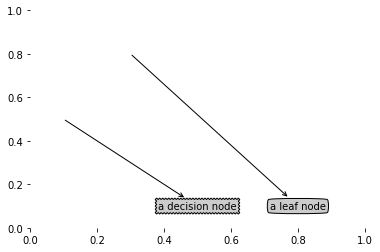

In [45]:
import treePlotter
treePlotter.createPlot()

In [50]:
reload(treePlotter)
myTree=treePlotter.retrieveTree(0)
treePlotter.getNumLeafs(myTree) # return 3
treePlotter.getTreeDepth(myTree) # return 2

2

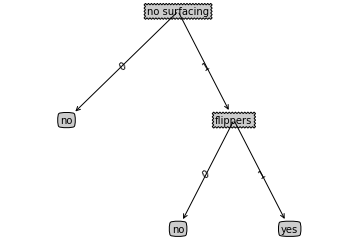

In [51]:
reload(treePlotter)
myTree=treePlotter.retrieveTree(0)
treePlotter.createPlot(myTree)

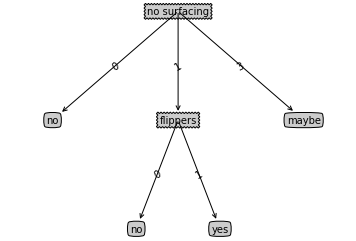

In [53]:
myTree['no surfacing'][3]='maybe'
myTree # {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}
treePlotter.createPlot(myTree)

In [73]:
reload(trees)
myDat, labels = trees.createDataSet() 
labels # ['no surfacing', 'flippers']
myTree = treePlotter.retrieveTree(0)
myTree # {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
trees.classify(myTree,labels,[1,0]) # no
trees.classify(myTree,labels,[1,1]) # yes
trees.classify(myTree,labels,[0]) # no , 이것은 아래와 같다
trees.classify(myTree,labels,[0,1]) # no

'no'

In [71]:
trees.storeTree(myTree,'classifierStorage.txt')
trees.grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

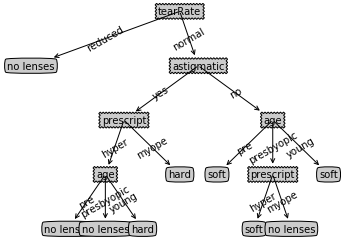

In [74]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript','astigmatic','tearRate']
lensesTree = trees.createTree(lenses, lensesLabels)
treePlotter.createPlot(lensesTree)

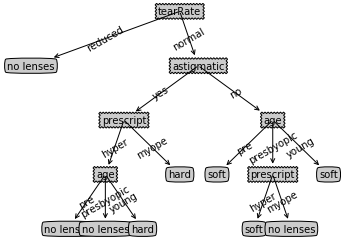

In [79]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
for line in lenses:
    tmp = line[2]
    line[2] = line[3]
    line[3] = tmp
lenses
lensesLabels = ['age','prescript','tearRate','astigmatic']
lensesTree = trees.createTree(lenses, lensesLabels)
treePlotter.createPlot(lensesTree)